In [5]:
#Loading the required packages for computation

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score

import keras
from keras.models import Sequential
from keras.layers import Dense

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import roc_auc_score, precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix 
from matplotlib import pyplot

Using TensorFlow backend.
C:\Users\jahna\anaconda3\envs\py36\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\jahna\anaconda3\envs\py36\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\jahna\anaconda3\envs\py36\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\jahna\anaconda3\envs\py36\lib\site-packag

In [6]:
#Loading the dataset

dataset= pd.read_csv("C:/Users/jahna/Downloads/diabetes.csv")


In [7]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
dataset.info

<bound method DataFrame.info of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   5

In [10]:
dataset.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [11]:
#Assigning x and y variables

x = dataset.iloc[:,:8].values
y = dataset.iloc[:,8:].values

In [12]:
x

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [13]:
y

array([[1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
    

In [14]:
#Splitting the dataset into training and testing

x_train, x_test, y_train, y_test = train_test_split(dataset.loc[:, dataset.columns != 'Outcome'], dataset['Outcome'], stratify=dataset['Outcome'], random_state=66)

In [15]:
#Logistic Regression

logreg = LogisticRegression().fit(x_train, y_train)
print("Logistic Regression accuracy - training: {:.3f}".format(logreg.score(x_train, y_train)))
print("Logistic Regression accuracy - test: {:.3f}".format(logreg.score(x_test, y_test)))


Logistic Regression accuracy - training: 0.781
Logistic Regression accuracy - test: 0.766


C:\Users\jahna\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Text(0, 0.5, 'Coefficient magnitude')

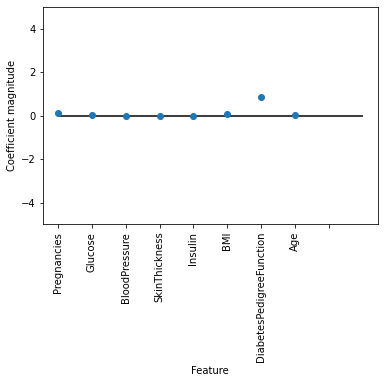

In [16]:
#Plotting Feature Importance

features = [x for i,x in enumerate(dataset.columns) if i!=8]
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.xticks(range(dataset.shape[1]), features, rotation=90)
plt.hlines(0, 0, dataset.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")


In [17]:
#Decision Tree

tree = DecisionTreeClassifier(max_depth=3, random_state=0)
tree.fit(x_train, y_train)
print("Decision Tree accuracy - training: {}".format(tree.score(x_train, y_train)))
print("Decision Tree accuracy - test: {}".format(tree.score(x_test, y_test)))

Decision Tree accuracy - training: 0.7725694444444444
Decision Tree accuracy - test: 0.7395833333333334


In [18]:
#Defining method for Feature Importance

def ImportantFeatures(model):
    n_features = 8
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), features)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

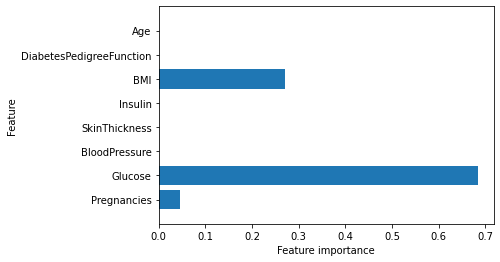

In [19]:
ImportantFeatures(tree)

In [20]:
#KNN

training_accuracy = []
test_accuracy = []

In [21]:
neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(x_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(x_train, y_train))
    # record test set accuracy
    test_accuracy.append(knn.score(x_test, y_test))

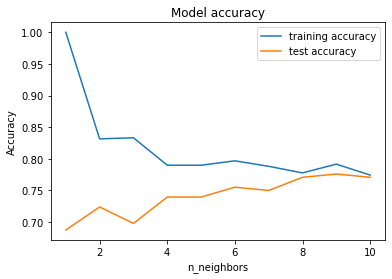

In [22]:
#Determing number of neighbors to chose

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.title('Model accuracy')
plt.legend()

In [23]:
#Determing 9 as best number of neighbors from above plot

knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(x_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(x_test, y_test)))

Accuracy of K-NN classifier on training set: 0.79
Accuracy of K-NN classifier on test set: 0.78


In [24]:
#Ramdom Forest 

RandomForest = RandomForestClassifier(n_estimators=100, random_state=0)
RandomForest.fit(x_train, y_train)
print("Random Forest accuracy - training: {}".format(RandomForest.score(x_train, y_train)))
print("Random Forest accuracy - test: {}".format(RandomForest.score(x_test, y_test)))

Random Forest accuracy - training: 1.0
Random Forest accuracy - test: 0.7864583333333334


In [25]:
#Used max_depth setting to overcome overfitting

RandomForest1 = RandomForestClassifier(max_depth=3, n_estimators=100, random_state=0)
RandomForest1.fit(x_train, y_train)
print("Accuracy on training set: {:.3f}".format(RandomForest1.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(RandomForest1.score(x_test, y_test)))

Accuracy on training set: 0.800
Accuracy on test set: 0.755


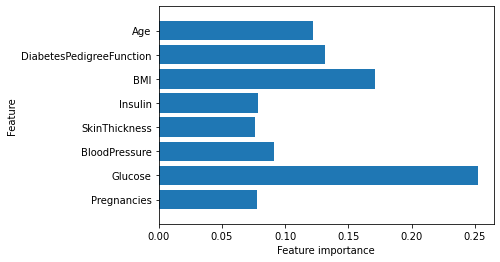

In [26]:
ImportantFeatures(RandomForest)

In [27]:
#Gradient Boosting

GradientBoosting = GradientBoostingClassifier(random_state=0)
GradientBoosting.fit(x_train, y_train)
print("Accuracy on training set: {:.3f}".format(GradientBoosting.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(GradientBoosting.score(x_test, y_test)))

Accuracy on training set: 0.917
Accuracy on test set: 0.792


In [28]:
#To overcome overfitting used max_depth setting

GradientBoosting1 = GradientBoostingClassifier(random_state=0, max_depth=1)
GradientBoosting1.fit(x_train, y_train)
print("Accuracy on training set: {:.3f}".format(GradientBoosting1.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(GradientBoosting1.score(x_test, y_test)))

Accuracy on training set: 0.804
Accuracy on test set: 0.781


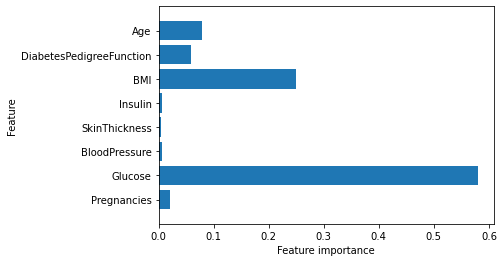

In [29]:
ImportantFeatures(GradientBoosting1)